In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

data = pd.read_csv("crime.csv")
data.head()
demo = data.iloc[0:10000]

## Demo dataset

In [2]:
demo.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


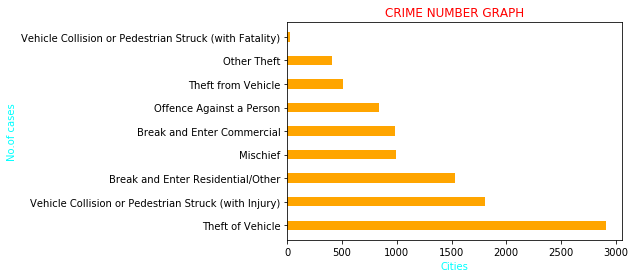

In [3]:
# Visualization

visual = demo['TYPE'].value_counts()

fig, ax = plt.subplots()

width = 0.4

ax.barh(visual.index,visual.values,width,color='Orange')

ax.set_ylabel('No.of cases', color= 'aqua')
ax.set_xlabel('Cities', color= 'aqua')
ax.set_title('CRIME NUMBER GRAPH', color='red')

plt.show()

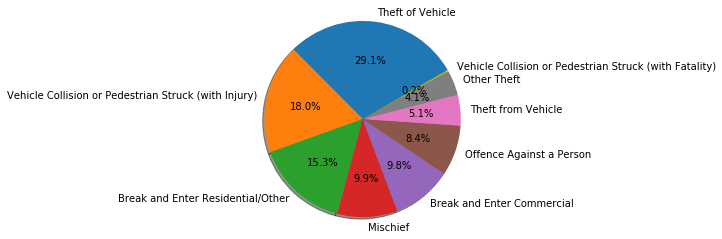

In [14]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode = (0, 0, 0, 0, 0, 0, 0, 0,0) 

fig1, ax1 = plt.subplots()
ax1.pie(visual.values, explode=explode, labels=visual.index, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal') 

plt.show()

In [5]:
# Removing Outliers
value_c = demo['Latitude'].value_counts()
rem = value_c[value_c<10].index
demo = demo[~demo['Latitude'].isin(rem)]

In [6]:
# Separating inputs and outputs
x = demo.iloc[:,[10,11]].values.reshape(-1,2)
y = demo['TYPE'].values

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
y[0:10]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 3])

In [7]:
# Train Test spliting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=3,test_size=0.20)

# Normalization
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)

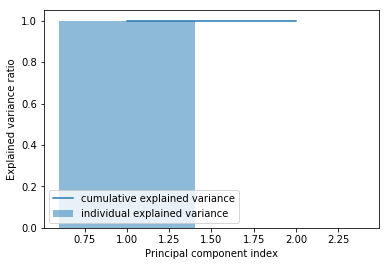

In [8]:
cov_mat = np.cov(x_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,3), var_exp, alpha=0.5,align='center', label='individual explained variance')
plt.step(range(1,3), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [9]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))#, eigen_pairs[2][1][:, np.newaxis], eigen_pairs[3][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [10]:
x_train_pca = x_train.dot(w)
x_test_pca = x_test.dot(w)

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_pca,y_train)
pred = knn.predict(x_test_pca)
print(confusion_matrix(y_test,pred))
score=cross_val_score(knn,x_train_pca,y_train,cv=5)
score.mean()

[[  1   0   0   0   0   1   0   0]
 [  0   6   0   0   0   0   0   0]
 [  0   0   0   0   0   8   0   0]
 [  0   0   0 165   0   0   0   0]
 [  0   0   0   0  63   0   0   0]
 [  1   0   3   0   0  31   0   0]
 [  0   0   0   0   3   0  10   0]
 [  0   0   0   0   0   0   0   7]]


0.9623675034867503

In [12]:
places = {}
for row in data.values:
    if row[6] not in places.keys():
        places[row[6]] = list(row[10:12])
places

{'9XX TERMINAL AVE': [49.26980201, -123.08376329999999],
 '63XX WILTSHIRE ST': [49.22805078, -123.1466105],
 '40XX W 19TH AVE': [49.25555918, -123.1937252],
 '18XX E 3RD AVE': [49.26773386, -123.067654],
 '40XX W 21ST AVE': [49.25376204, -123.19440700000001],
 '63XX WINDSOR ST': [49.22642977, -123.08528340000001],
 '10XX ALBERNI ST': [49.28471484, -123.12282420000001],
 'OFFSET TO PROTECT PRIVACY': [0.0, 0.0],
 '9XX SEYMOUR ST': [49.27937407, -123.1209199],
 '9XX ROBSON ST': [49.28269223, -123.12193229999998],
 '40XX W 27TH AVE': [49.24807387, -123.1948057],
 '9XX NICOLA ST': [49.28661123, -123.1341283],
 '10XX CARDERO ST': [49.28723347, -123.135476],
 '11XX MAINLAND ST': [49.27472125, -123.1217449],
 '11XX HAMILTON ST': [49.2758439, -123.1211037],
 '11XX NOOTKA ST': [49.27462571, -123.04132549999999],
 '11XX HARO ST': [49.28472338, -123.12723770000001],
 '10XX BROUGHTON ST': [49.28537670000001, -123.1336862],
 '9XX DENMAN ST': [49.2903511, -123.1372304],
 '9XX DAVIE ST': [49.27843487,

In [13]:
location = input("Enter the location::")
x = places[location]
x = np.array(x).reshape(-1,2)
x = norm.transform(x)
x = x.dot(w)
y = knn.predict(x)
y = le.inverse_transform(y)
print("A crime of type ("+y[0]+") has a possiblity in this locality")

Enter the location::RENFREW ST / E GEORGIA ST
A crime of type (Vehicle Collision or Pedestrian Struck (with Injury)) has a possiblity in this locality
